# LR with muliple features

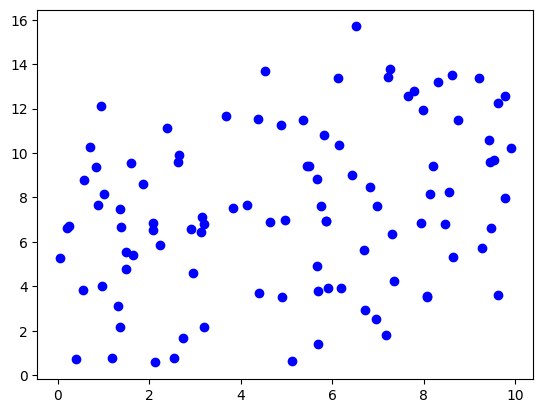

Initial predictions:
 [[12.87322504]
 [15.24580876]
 [12.52299195]
 [ 7.90511736]
 [ 6.80890124]]
(100, 1)
Initial cost: 36.666780297917704


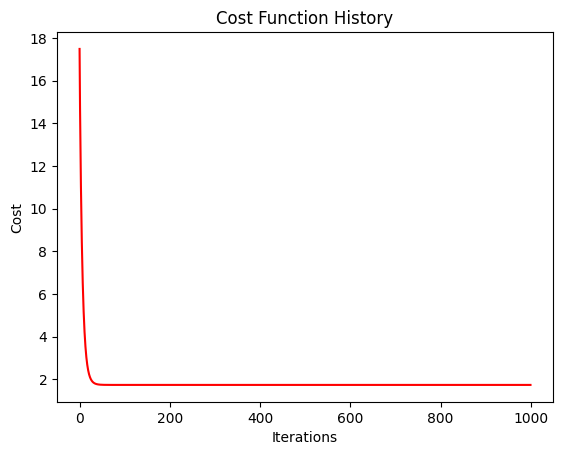

Final parameters (theta):
 [[-0.13275559]
 [ 0.21986884]
 [ 0.19810421]
 [ 1.05284908]]
Final cost: 1.7299670886344223


In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate synthetic data
n_samples = 100
X = np.random.rand(n_samples, 3) * 10  # Features between
Y = (0.3 * X[:, 0] + 0.2 * X[:, 1] + X[:, 2] + np.random.randn(n_samples) * 2).reshape(-1, 1)

# Plot the data
plt.scatter(X[:, 0], Y, color='blue', label='Feature 1 vs Target')
plt.show()

# Add bias term to features
X_b = np.c_[np.ones((n_samples, 1)), X]  # Add bias term (column of ones)

# Hypothesis function
def hypothesis(X, theta):
    return X.dot(theta)

initial_theta = np.random.randn(X_b.shape[1], 1)
initial_predictions = hypothesis(X_b, initial_theta)
print("Initial predictions:\n", initial_predictions[:5])
print(initial_predictions.shape)

# Cost function (Mean Squared Error)
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

initial_cost = compute_cost(X_b, Y, initial_theta)
print("Initial cost:", initial_cost)

# Gradient Descent
def gradient_descent(X, Y, theta, learning_rate=0.01, n_iterations=1000):
    m = len(Y)
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - Y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

learning_rate = 0.01
n_iterations = 1000
theta_final, cost_history = gradient_descent(X_b, Y, initial_theta, learning_rate, n_iterations)

# Plot cost history
plt.plot(range(n_iterations), cost_history, color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

print("Final parameters (theta):\n", theta_final)
print("Final cost:", compute_cost(X_b, Y, theta_final))


In [9]:
# using sklearn for comparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, Y)
Y_pred_sklearn = model.predict(X)
print("Sklearn parameters (theta):\n", np.c_[model.intercept_, model.coef_])
print("Sklearn cost (MSE):", mean_squared_error(Y, Y_pred_sklearn) / 2)

Sklearn parameters (theta):
 [[-0.0995722   0.21826495  0.19599133  1.0506462 ]]
Sklearn cost (MSE): 1.7299108784943196


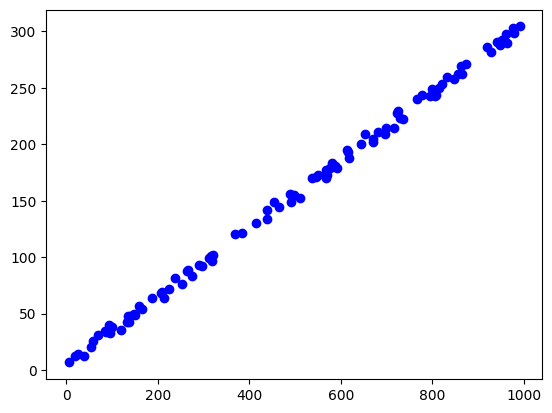

Initial predictions:
 [[0.20390051]
 [0.24544582]
 [0.19633741]
 [0.11859438]
 [0.10059038]]
(100, 1)
Initial cost: 16171.760291807457


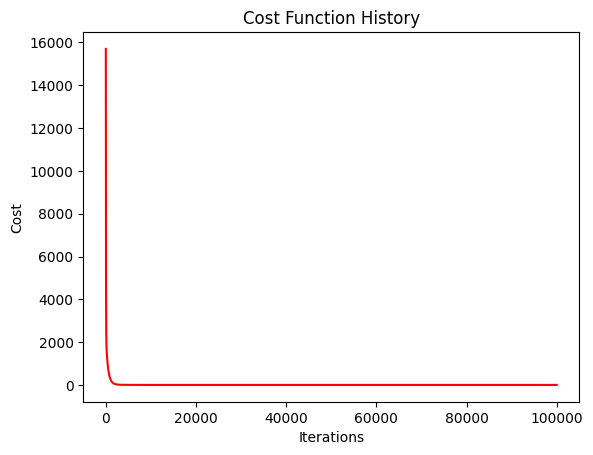

Final parameters (theta):
 [[-9.95721951e-01]
 [ 1.74337616e+03]
 [ 1.11221741e+01]
 [ 6.22666084e+01]]
Final cost: 1.729910878494321


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

np.random.seed(0)

# Generate synthetic data
n_samples = 100
X = np.random.rand(n_samples, 3) * 10  # Features between
X[:, 0] = X[:, 0] * 100  # Scale feature 100
Y = (0.3 * X[:, 0] + 0.2 * X[:, 1] + X[:, 2] + np.random.randn(n_samples) * 2).reshape(-1, 1)

# Plot the data
plt.scatter(X[:, 0], Y, color='blue', label='Feature 1 vs Target')
plt.show()

# Add bias term to features
X_b = np.c_[np.ones((n_samples, 1)), X]  # Add bias term (column of ones)
X = normalize(X_b, axis=0, copy=False)  # Normalize features

# Hypothesis function
def hypothesis(X, theta):
    return X.dot(theta)

initial_theta = np.random.randn(X_b.shape[1], 1)
initial_predictions = hypothesis(X_b, initial_theta)
print("Initial predictions:\n", initial_predictions[:5])
print(initial_predictions.shape)

# Cost function (Mean Squared Error)
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

initial_cost = compute_cost(X_b, Y, initial_theta)
print("Initial cost:", initial_cost)

# Gradient Descent
def gradient_descent(X, Y, theta, learning_rate=0.01, n_iterations=1000):
    m = len(Y)
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - Y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

learning_rate = 0.5
n_iterations = 100000
theta_final, cost_history = gradient_descent(X_b, Y, initial_theta, learning_rate, n_iterations)

# Plot cost history
plt.plot(range(n_iterations), cost_history, color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

print("Final parameters (theta):\n", theta_final)
print("Final cost:", compute_cost(X_b, Y, theta_final))


# Polynomial Regression

(100, 4) (100, 1)


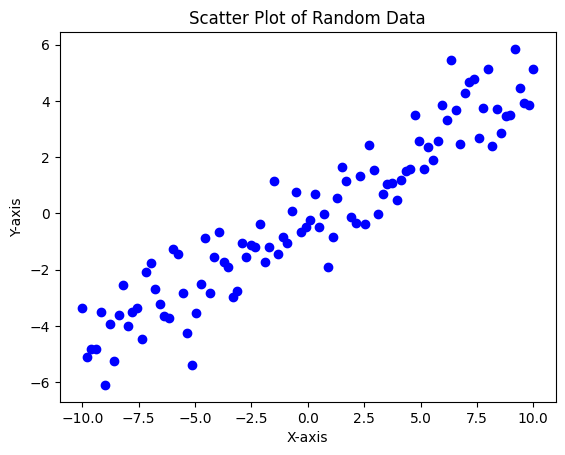

Initial Cost: 2069.2626754173516


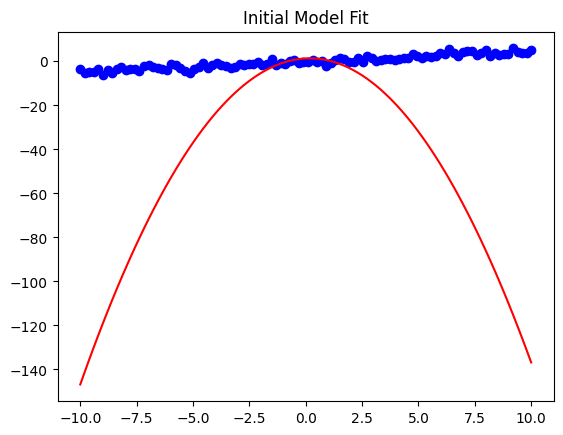

Final Parameters: [[-0.05795928]
 [ 1.29725072]
 [ 0.47205501]
 [-0.02053574]]
Final Cost: 0.9769775849133997


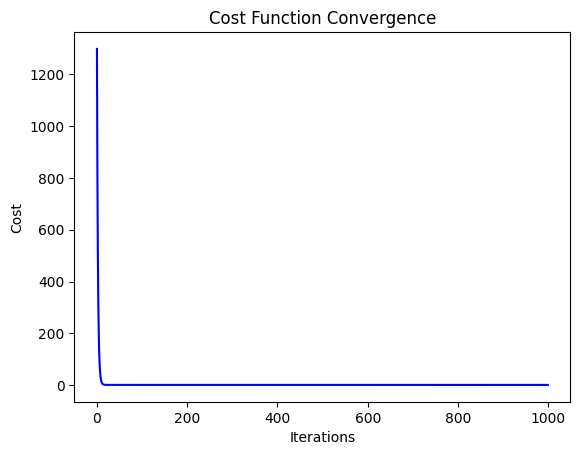

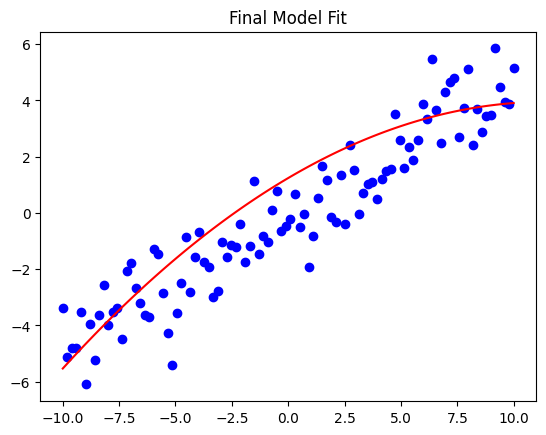

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(-10, 10, 100)
Y = np.random.randn(100) + 0.5 * X
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly = np.concatenate((np.ones((100, 1)), X_poly), axis=1)

print(X_poly.shape, Y.shape)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.title('Scatter Plot of Random Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

def hypothesis(theta, x):
    return x.dot(theta)

Theta = np.random.randn(X_poly.shape[1], 1)
Theta = Theta.reshape(-1, 1)

initial_predictions = hypothesis(Theta, X_poly)

# print(initial_predictions[:5])
# print(initial_predictions.shape)

def cost_function(X, Y, theta):
    m = len(Y)
    predictions = hypothesis(theta, X)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - Y))
    return cost

initial_cost = cost_function(X_poly, Y, Theta)
print(f'Initial Cost: {initial_cost}')

# Initial model visualization
plt.scatter(X_poly[:, 2], Y, color='blue', label='Data Points')
plt.plot(X_poly[:, 2], initial_predictions, color='red', label='Initial Model')
plt.title('Initial Model Fit')
plt.show()


# Gradient Descent
def gradient_descent(X, Y, theta, learning_rate=0.0001, iterations=100):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = hypothesis(theta, X)
        errors = predictions - Y
        theta -= (learning_rate / m) * (X.T.dot(errors))
        cost_history[i] = cost_function(X, Y, theta)

    return theta, cost_history

learning_rate = 0.0001
iterations = 1000
Theta_final, cost_history = gradient_descent(X_poly, Y, Theta, learning_rate, iterations)
print(f'Final Parameters: {Theta_final}')
final_cost = cost_function(X_poly, Y, Theta_final)
print(f'Final Cost: {final_cost}')

# Cost History
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


# Trained model visualization
final_predictions = hypothesis(Theta_final, X_poly)
plt.scatter(X_poly[:, 2], Y, color='blue', label='Data Points')
plt.plot(X_poly[:, 2], final_predictions, color='red', label='Final Model')
plt.title('Final Model Fit')
plt.show()